In [2]:
!pip3 install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in c:\users\rupa\appdata\roaming\python\python36\site-packages (0.4.1)


You are using pip version 18.1, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import skfuzzy as fuzz

In [4]:
import numpy as np

In [5]:
my_data = np.genfromtxt('dataset/mat_csv.csv', delimiter=',')

In [6]:
my_data.shape

(48, 264)

In [32]:
cntr, u_orig, _, _, _, _, _ = fuzz.cmeans(my_data, 20, 0.2, 
                                          error = 0.25, maxiter = 500)

In [25]:
import matplotlib.pyplot as plt

In [26]:
u_orig

array([[0.50396502, 0.50396502, 0.50396502, 0.50385875, 0.50132923,
        0.50255975, 0.50185644, 0.49972541, 0.50359515, 0.50384914,
        0.50396502, 0.50002222, 0.49934839, 0.49998764, 0.50199926,
        0.4995996 , 0.50396502, 0.50396502, 0.50396502, 0.50051487,
        0.50396502, 0.50368452, 0.50399991, 0.5030727 , 0.50390575,
        0.50390277, 0.50385735, 0.50396502, 0.50396502, 0.50396502,
        0.50396502, 0.50396502, 0.50384015, 0.50396502, 0.5028953 ,
        0.50367711, 0.50396502, 0.50396502, 0.50396502, 0.50353886,
        0.50396502, 0.50396502, 0.49980495, 0.49982353, 0.49978108,
        0.49957323, 0.49970561, 0.50396502],
       [0.49603498, 0.49603498, 0.49603498, 0.49614125, 0.49867077,
        0.49744025, 0.49814356, 0.50027459, 0.49640485, 0.49615086,
        0.49603498, 0.49997778, 0.50065161, 0.50001236, 0.49800074,
        0.5004004 , 0.49603498, 0.49603498, 0.49603498, 0.49948513,
        0.49603498, 0.49631548, 0.49600009, 0.4969273 , 0.49609425,
   

In [33]:
cntr.shape

(20, 48)

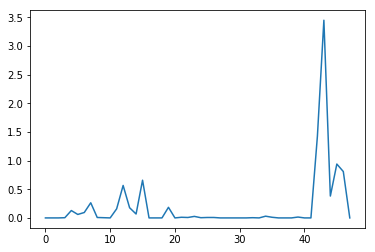

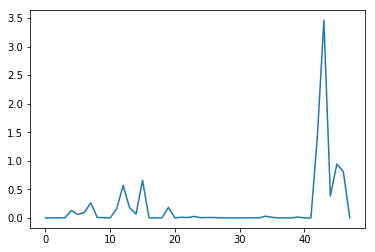

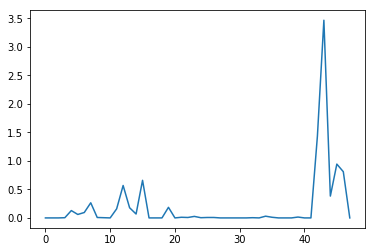

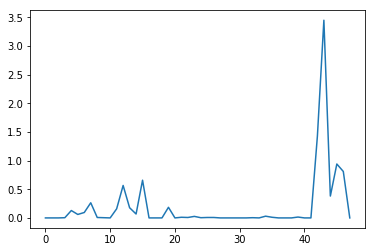

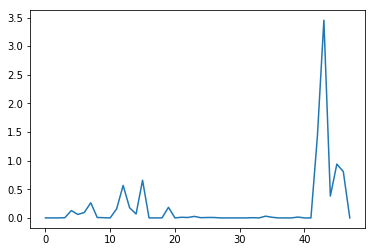

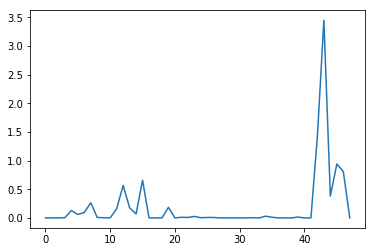

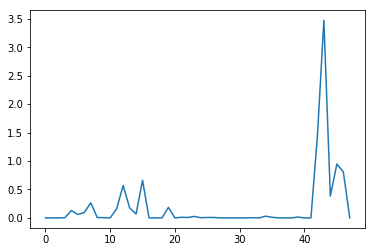

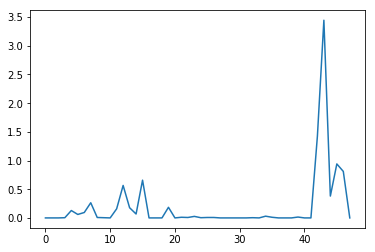

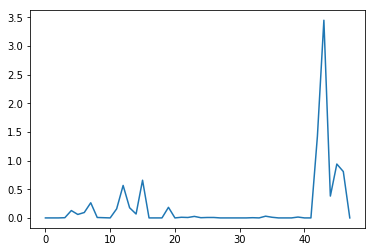

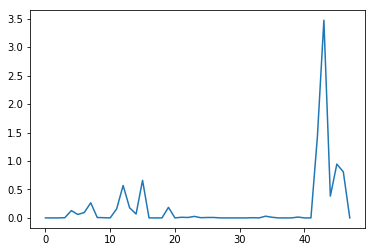

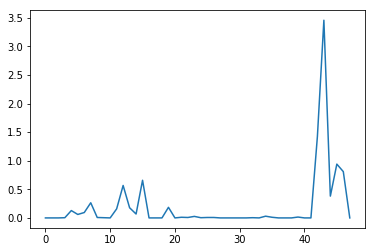

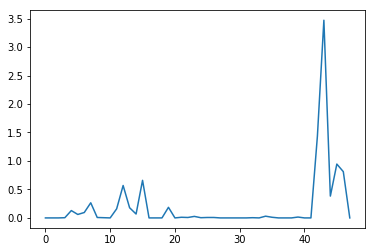

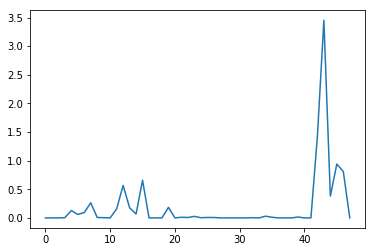

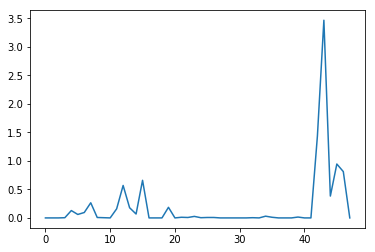

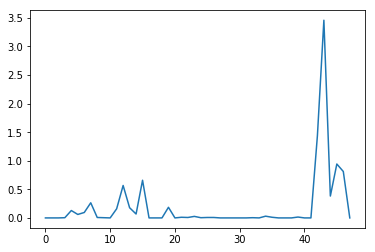

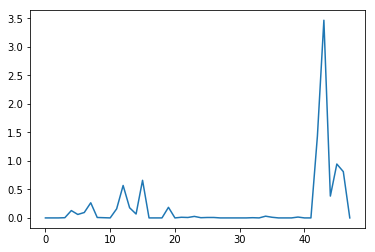

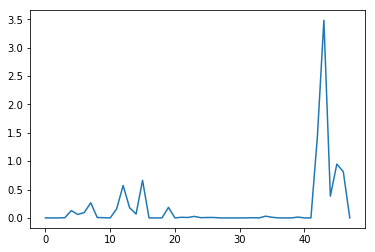

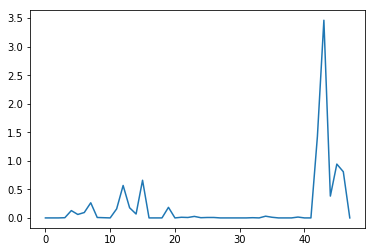

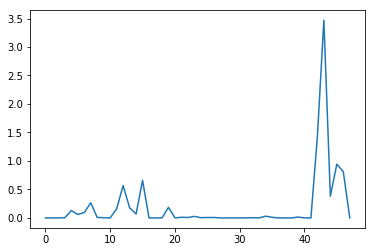

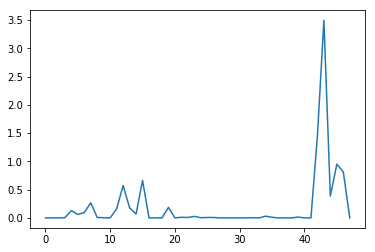

In [41]:
for j in range(20):
    plt.figure()
    plt.plot([i for i in range(48)], cntr[j])
    plt.show()

IndexError: index 48 is out of bounds for axis 1 with size 48

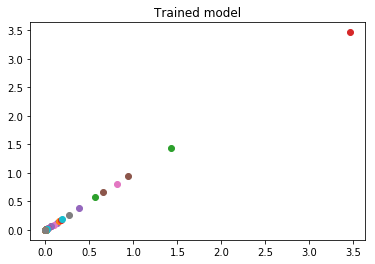

In [21]:
fig2, ax2 = plt.subplots()
#ax2.axis([-0.001, ])
ax2.set_title('Trained model')
for j in range(50):
    ax2.plot(cntr[0, j],
             cntr[1, j], 'o',
             label='series ' + str(j))